#**Descriptive Statistics**

Descriptive statistics analysis helps to describe the basic features of dataset and obtain a brief summary of the data.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [5]:
df=pd.read_csv('C:/Users/msh/eda/Data/eda.csv')
df.head()

,quarter,Year,Sales,Type
0,Q1,2000,694513,B
1,Q2,2000,751698,A
2,Q3,2000,745556,B
3,Q4,2000,791509,A
4,Q1,2001,704201,B


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   quarter  68 non-null     object
 1   Year     68 non-null     int64 
 2   Sales    68 non-null     int64 
 3   Type     68 non-null     object
dtypes: int64(2), object(2)
memory usage: 2.2+ KB


### Describe Numerical Value

In [7]:
df.describe()

,Year,Sales
count,68.000000,6.800000e+01
mean,2008.000000,9.690075e+05
std,4.935404,1.517203e+05
min,2000.000000,6.945130e+05
25%,2004.000000,8.345058e+05
50%,2008.000000,9.641050e+05
75%,2012.000000,1.069927e+06
max,2016.000000,1.315101e+06


In [8]:
df['Sales'].describe()

count    6.800000e+01
mean     9.690075e+05
std      1.517203e+05
min      6.945130e+05
25%      8.345058e+05
50%      9.641050e+05
75%      1.069927e+06
max      1.315101e+06
Name: Sales, dtype: float64

In [9]:
df['Sales'].describe()['mean']

969007.5294117647

##**Box Plot**

We can describe the values of the columns by calculating the sum of several percentiles and show in boxplot. 

In [10]:
print('Min= ',df['Sales'].quantile(0),'\n'
      'First Quartile:' ,df['Sales'].quantile(0.25),'\n'
      'Median= ',df['Sales'].quantile(0.5),'\n'
      'Third Quartile:' ,df['Sales'].quantile(0.75),'\n'
      'Max= ',df['Sales'].quantile(1),'\n'
      'Random Quartile:' ,df['Sales'].quantile(0.8))

Min=  694513.0 
First Quartile: 834505.75 
Median=  964105.0 
Third Quartile: 1069927.25 
Max=  1315101.0 
Random Quartile: 1108802.0


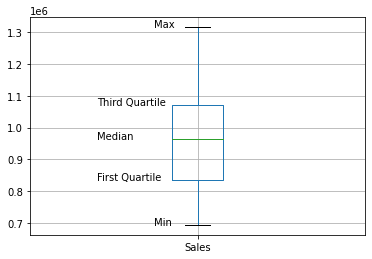

In [11]:
figsize=(8,6)
df.boxplot(column="Sales",return_type='axes')
plt.text(x=0.7, y=df['Sales'].quantile(.25), s="First Quartile",)
plt.text(x=0.7,y=df['Sales'].quantile(.5) ,s="Median")
plt.text(x=0.7, y=df['Sales'].quantile(.75), s="Third Quartile")
plt.text(x=0.87, y=df['Sales'].quantile(0), s="Min")
plt.text(x=0.87, y=df['Sales'].quantile(1), s="Max")
plt.show()

##**Scatter Plot**

A scatter plot is a diagram where each value in the data set is represented by a dot.

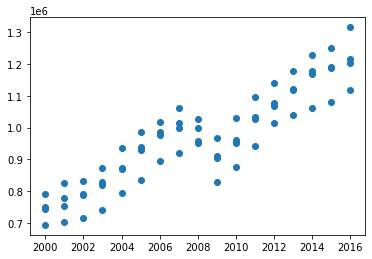

In [13]:
plt.scatter(df.Year,df.Sales)
plt.show()